### フィッシャーの線形判別分析法をpythonで実装してみた

https://tips-memo.com/python-fisher-lda

In [1]:
import numpy as np

# 行列計算用
import numpy.linalg as LA

import matplotlib.pyplot as plt

# 配色するためのc_map
cm = plt.get_cmap("tab10")

In [57]:
# データの生成
m1 = np.array([5, 2])
s1 = np.array([[1, 2], [2, 6]])
m2 = np.array([1, 3])
s2 = np.array([[1, 2], [2, 10]])

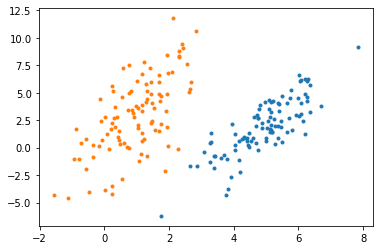

In [60]:
N = 100

x1 = np.random.multivariate_normal(m1, s1, N)
x2 = np.random.multivariate_normal(m2, s2, N)

plt.plot(x1[:, 0], x1[:, 1], '.', color=cm(0))
plt.plot(x2[:, 0], x2[:, 1], '.', color=cm(1))
#plt.axis('equal')
plt.show()

重みパラメータ $w$ :\
$w \propto S^{-1}_{w}(m_2 - m_1)$

\
総クラス内共分散行列 $S_{w}$ :\
$\displaystyle S_{w} = \sum_{n \in C_1}(x_n - m_1)(x_n - m_1)^{T} + \sum_{n \in C_2}(x_n - m_2)(x_n - m_2)^{T}$

In [61]:
# 総クラス内共分散行列を求める関数
def cal_sw(x1, m1, x2, m2):
  # @ は行列の乗算のための演算子。　式の見た目の通りに記述できてわかりやすい
  sw = ((x1 - m1).T @ (x1 - m1)) + ((x2 - m2).T @ (x2 - m2))
  return sw

In [69]:
# 実際に計算
w = LA.inv(cal_sw(x1, m1, x2, m2)) @ (m2 - m1)

In [87]:
# x軸
xlist = np.arange(-2, 8, 0.1)

m = (m1 + m2)/2
# フィッシャーの基準に従って求めた射影先の軸
ylist = m[1] + (w[1]/w[0]) * (xlist - m[0])

# 射影先の軸に直交するような識別面
ydisc = m[1] + (-w[0]/w[1]) * (xlist - m[0])

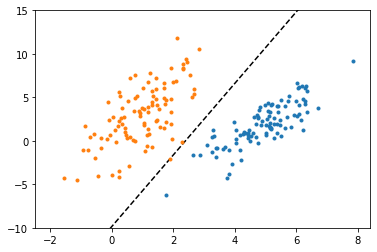

In [90]:
#plt.plot(xlist, ylist, color=cm(4))
plt.plot(xlist, ydisc, linestyle='dashed', color='black')

plt.plot(x1[:,0], x1[:,1], '.', color=cm(0))
plt.plot(x2[:,0], x2[:,1], '.', color=cm(1))

#plt.axis('equal')
#plt.xlim(-5,10)
plt.ylim(-10,15)
plt.show()

# 実線がFisherの基準による射影先の軸，点線がそれに直交する識別面を表す

### https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

In [91]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [92]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [93]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [94]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

explained variance ratio (first two components): [0.92461872 0.05306648]


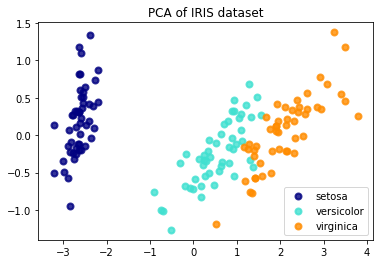

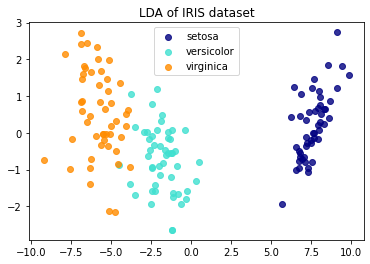

In [95]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(X_r[y == i, 0], X_r[y == i, 1],
              color=color,
              alpha=.8,
              lw=lw,
              label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')


plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1],
              alpha=.8,
              color=color,
              label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

### フィッシャーの線形判別分析法
https://qiita.com/pira/items/4c84399671be2cb598e4

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# データの次元数
DIM = 2

In [97]:
# 直線の式
def f(x, a, b):
  return a*x+b

In [108]:
# 図示
def plot(cls1, cls2, line=None):
  x1, y1 = cls1.T
  plt.plot(x1, y1, 'bo', ms=3, label='class1')
  x2, y2 = cls2.T
  plt.plot(x2, y2, 'ro', ms=3, label='class2')

  if not (line is None):
    plt.plot(line[0], line[1], 'k-', ms=5)
  
  plt.xlim(-12, 12)
  plt.ylim(-12, 12)
  plt.show()

In [99]:
## ２次元データ生成
# 共分散
cov = [[3, 1], [1, 3]]
cls1 = np.random.multivariate_normal([-5, -5], cov, 100)
cls2 = np.random.multivariate_normal([5, 5], cov, 100)

In [100]:
# listからnp.arrayに変換（行列の転置や逆行列を扱うため）
cls1 = np.array(cls1)
cls2 = np.array(cls2)

In [101]:
# 各クラスの平均値
mean1 = np.mean(cls1, axis=0)
mean2 = np.mean(cls2, axis=0)

In [102]:
# 総クラス内共分散行列
sw = np.zeros((DIM, DIM))
for xn in cls1:
  xn = xn.reshape(DIM, 1)
  mean1 = mean1.reshape(DIM, 1)
  sw += np.dot((xn - mean1), (xn - mean1).T)

for xn in cls2:
  xn = xn.reshape(DIM, 1)
  mean2 = mean2.reshape(DIM, 1)
  sw += np.dot((xn - mean2), (xn - mean2).T)

In [103]:
# 総クラス内共分散行列の逆行列
sw_inv = np.linalg.inv(sw)

In [104]:
# wを求める
w = np.dot(sw_inv, (mean1 - mean2))

In [109]:
## 決定境界直線を図示する
# 平均値の中点
mean = (mean1 + mean2)/2

# wと直交する傾き
a = -w[0]/w[1]  

# 切片
b = a*mean[0] + mean[1]

x = np.linspace(-8, 8, 1000)
y = f(x, a, b)

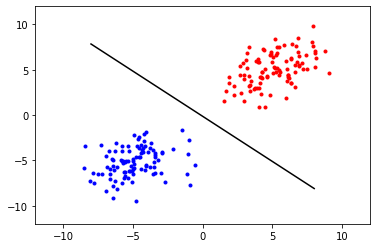

In [110]:
plot(cls1, cls2, (x, y))

In [115]:
print('w = [{}, {}]'.format(w[0], w[1]))

w = [[-0.01256224], [-0.01259799]]


### 機械学習に詳しくなりたいブログ
https://www.iwanttobeacat.com/entry/2018/05/22/001303

https://www.iwanttobeacat.com/entry/2018/05/26/203825

https://www.iwanttobeacat.com/entry/2018/06/10/211719

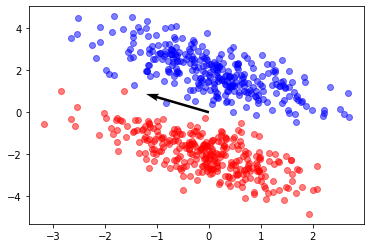

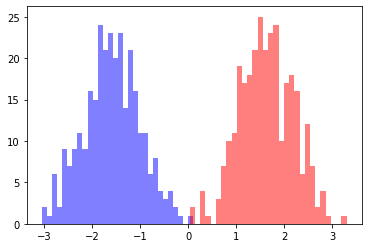

In [123]:
# フィッシャーの線形判別
import matplotlib.pyplot as plt
import numpy as np

# 各クラスのデータ数
N = 300

# 入力次元数
D = 2

# クラス数
K = 2

# ランダムシードを固定
np.random.seed(0)

# 2クラス分のデータを作成
mean1 = np.array([0, 2])
mean2 = np.array([0, -2])
cov = [[1.0, -0.7], [-0.7, 1.0]]
x1 = np.random.multivariate_normal(mean1, cov, N).T
x2 = np.random.multivariate_normal(mean2, cov, N).T

# 各クラスの平均ベクトルを求める
m1 = np.array([np.average(x1[0, :]), np.average(x1[1, :])]).reshape(D, 1)
m2 = np.array([np.average(x2[0, :]), np.average(x2[1, :])]).reshape(D, 1)

# クラス内共分散行列を求める
Sw = np.zeros([D, D])
for i in range(N):
  Sw = np.dot((x1[:, i].reshape(D, 1) - m1), (x1[:, i].reshape(D, 1) - m1).T) + \
              np.dot((x2[:, i].reshape(D, 1) - m2), (x2[:, i].reshape(D, 1) - m2).T) + Sw

# wを求め、グラフ表示用に長さを調整
w = np.dot(np.linalg.inv(Sw), (m2-m1))
w = w/np.linalg.norm(w)

plt.scatter(x1[0, :], x1[1, :], color="blue", alpha=0.5)
plt.scatter(x2[0, :], x2[1, :], color="red", alpha=0.5)
# 射影の方向は直線wに対して垂直方向
plt.quiver(0, 0, w[1, 0], -w[0, 0], angles="xy", units="xy", color="black", scale=0.5)
plt.show()

y1 = np.dot(w.T, x1)
y2 = np.dot(w.T, x2)

plt.hist(y1[0], bins=30, color="blue", alpha=0.5)
plt.hist(y2[0], bins=30, color="red", alpha=0.5)
plt.show()

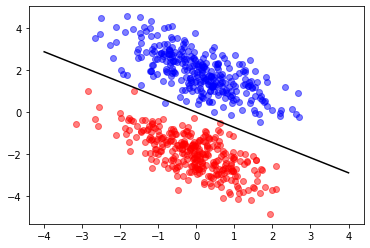

In [124]:
plt.scatter(x1[0, :], x1[1, :], color="blue", alpha=0.5)
plt.scatter(x2[0, :], x2[1, :], color="red", alpha=0.5)

xline = np.linspace(-4, 4, 100)
yline = xline * (-w[0, 0]/w[1, 0])
# 射影の方向は直線wに対して垂直方向
plt.plot(xline, yline, color="black")
plt.show()

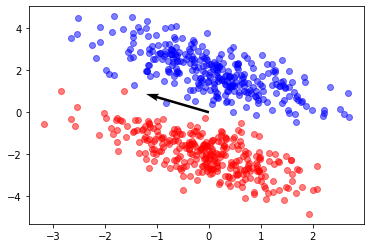

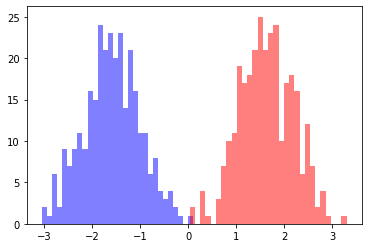

In [122]:
# フィッシャーの線形判別
import matplotlib.pyplot as plt
import numpy as np

# 各クラスのデータ数
N = 300

# 入力次元数
D = 2

# クラス数
K = 2

# ランダムシードを固定
np.random.seed(0)

# 2クラス分のデータを作成
mean1 = np.array([0, 2])
mean2 = np.array([0, -2])
cov = [[1.0, -0.7], [-0.7, 1.0]]
x1 = np.random.multivariate_normal(mean1, cov, N).T
x2 = np.random.multivariate_normal(mean2, cov, N).T

# 各クラスの平均ベクトルを求める
m1 = np.array([np.average(x1[0, :]), np.average(x1[1, :])]).reshape(D, 1)
m2 = np.array([np.average(x2[0, :]), np.average(x2[1, :])]).reshape(D, 1)

# クラス内共分散行列を求める
Sw = np.zeros([D, D])
for i in range(N):
    Sw = np.dot((x1[:, i].reshape(D, 1)-m1), (x1[:, i].reshape(D, 1)-m1).T) + \
        np.dot((x2[:, i].reshape(D, 1)-m2), (x2[:, i].reshape(D, 1)-m2).T) + Sw

# クラス間共分散行列を求める
SB = np.outer((m2 - m1), (m2- m1))

# 固有値と固有ベクトルを求める
lam, v = np.linalg.eig(np.dot(np.linalg.inv(Sw),SB))

# 最大固有に対応する固有ベクトルが求めるw　グラフ表示用に大きさ調整
w = v[:, np.argmax(lam)]
w = (w/np.linalg.norm(w)).reshape(D, 1)

plt.scatter(x1[0, :], x1[1, :], color="blue", alpha=0.5)
plt.scatter(x2[0, :], x2[1, :], color="red", alpha=0.5)
# 射影の方向は直線wに対して垂直方向
plt.quiver(0, 0, w[1], -w[0], angles="xy", units="xy", color="black", scale=0.5)
plt.show()

y1 = np.dot(w.T, x1)
y2 = np.dot(w.T, x2)

plt.hist(y1[0], bins=30, color="blue", alpha=0.5)
plt.hist(y2[0], bins=30, color="red", alpha=0.5)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


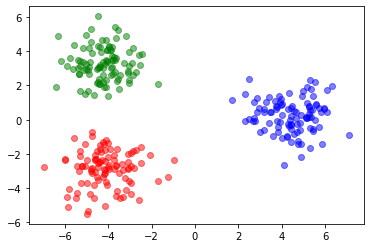

In [118]:
# フィッシャーの線形判別 多クラス
import matplotlib.pyplot as plt
import numpy as np

# 各クラスのデータ数
N = 100

# クラス数
K = 3

# 入力次元数
D = 4

# 削減後の次元
D2 = 2

# ランダムシードを固定
np.random.seed(0)

# 4クラス分のデータを作成
mean1 = np.array([-3, 3, -3, 0])
mean2 = np.array([3, 3, 3, -3])
mean3 = np.array([3, 3, 3, 3])

cov = np.eye(D, D)
x1 = np.random.multivariate_normal(mean1, cov, N).T
x2 = np.random.multivariate_normal(mean2, cov, N).T
x3 = np.random.multivariate_normal(mean3, cov, N).T

xx = np.array([x1, x2, x3])

# 各クラスの平均ベクトルを求める
m1 = np.array([np.average(x1[i, :]) for i in range(D)]).reshape(D, 1)
m2 = np.array([np.average(x2[i, :]) for i in range(D)]).reshape(D, 1)
m3 = np.array([np.average(x3[i, :]) for i in range(D)]).reshape(D, 1)
mx = np.array([m1, m2, m3])

# 全クラスの平均ベクトル
m = (m1 + m2 + m3)/K

# クラス間共分散行列を求める
SB = np.zeros([D, D])
for i in range(K):
    SB += N*np.outer((mx[i] - m), (mx[i] - m))

# クラス内共分散行列を求める
SW = np.zeros([D, D])
for k in range(K):
    for i in range(N):
        SW += np.outer((xx[k][:, i] - mx[k][:, 0]), (xx[k][:, i] - mx[k][:, 0]))

# Wを求める(SW^(-1)SBの固有ベクトルの中から、固有値の大きいものから次元数分使用)
## 中の値が複素数になっている -> ComplexWarning: Casting complex values to real discards the imaginary part return array(a, dtype, copy=False, order=order, subok=True)
lam, v = np.linalg.eig(np.dot(np.linalg.inv(SW), SB))

v = v[:, np.argsort(lam)[::-1]]
W = v[:, 0:D2]

# 結果確認
y1 = np.dot(W.T, x1)
y2 = np.dot(W.T, x2)
y3 = np.dot(W.T, x3)
plt.scatter(y1[0, :], y1[1, :], color="blue", alpha=0.5)
plt.scatter(y2[0, :], y2[1, :], color="red", alpha=0.5)
plt.scatter(y3[0, :], y3[1, :], color="green", alpha=0.5)
plt.show()

In [120]:
lam

array([ 1.66625113e+01+0.00000000e+00j,  6.42977403e+00+0.00000000e+00j,
       -2.45374610e-16+3.23274802e-16j, -2.45374610e-16-3.23274802e-16j])

In [121]:
v

array([[-0.68868028+0.j        ,  0.02159613+0.j        ,
        -0.61754201+0.j        , -0.61754201-0.j        ],
       [ 0.02690076+0.j        ,  0.05563734+0.j        ,
        -0.31834698-0.41753333j, -0.31834698+0.41753333j],
       [-0.72332869+0.j        , -0.00376808+0.j        ,
         0.58439113+0.00104583j,  0.58439113-0.00104583j],
       [ 0.04232514+0.j        ,  0.99821035+0.j        ,
         0.03641013+0.01109959j,  0.03641013-0.01109959j]])